<a href="https://colab.research.google.com/github/joshimohitm9/ML_quick_revison/blob/main/Deeplearning_quick_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# **ANN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
 df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
x=df.iloc[:,:-1]
y=df["Exited"]

In [ ]:
for i in df.columns:
  if df[i].dtype=="object":
        print(i)
  else:
    None


Surname
Geography
Gender


In [ ]:
x["Surname"].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
x["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop="first")


ohe_Geography=ohe.fit_transform(x[["Geography"]]).toarray()
geography_feature=ohe.get_feature_names_out(["Geography"])
x_geography=pd.DataFrame(ohe_Geography,columns=geography_feature)

ohe_gender=ohe.fit_transform(x[["Gender"]]).toarray()
gender_feature=ohe.get_feature_names_out(["Gender"])
x_gender=pd.DataFrame(ohe_gender,columns=gender_feature)

x_final=pd.concat([x,x_geography,x_gender],axis=1)

x_final.drop(columns=["RowNumber","CustomerId","Surname","Geography","Gender"],inplace=True)
x_final.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.2,random_state=9)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=x_final.columns)

x_test=sc.fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=x_final.columns)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU
from tensorflow.keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(units=11, activation="relu"))
classifier.add(Dropout(0.3))  # Increased dropout rate
classifier.add(Dense(units=7, activation="relu"))
classifier.add(Dropout(0.3))  # Increased dropout rate
classifier.add(Dense(units=6, activation="relu"))
classifier.add(Dense(units=3, activation="relu"))
classifier.add(Dense(units=2, activation="relu"))
classifier.add(Dense(units=1, activation="sigmoid"))



import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])


early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto"
)


model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
536/536 [==============================] - 16s 10ms/step - loss: 0.5466 - accuracy: 0.7966 - val_loss: 0.4618 - val_accuracy: 0.8012
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4771 - accuracy: 0.7966 - val_loss: 0.4329 - val_accuracy: 0.8012
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4608 - accuracy: 0.7966 - val_loss: 0.4263 - val_accuracy: 0.8012
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4465 - accuracy: 0.7966 - val_loss: 0.4141 - val_accuracy: 0.8012
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4441 - accuracy: 0.7966 - val_loss: 0.4073 - val_accuracy: 0.8012
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4309 - accuracy: 0.7983 - val_loss: 0.4023 - val_accuracy: 0.8126
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4298 - accuracy: 0.8078 - val_loss: 0.3988 - val_accurac

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

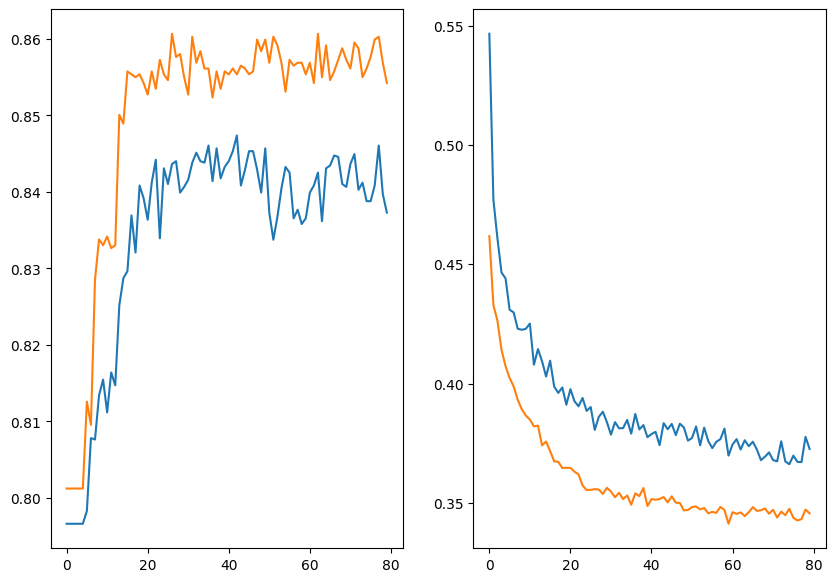

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])

plt.subplot(1,2,2)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

In [ ]:
y_pred=classifier.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred= (y_pred >=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1500,   78],
       [ 201,  221]])

In [ ]:
accuracy_score(y_pred,y_test)

0.8605

# **CNN**

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_test=(x_train/255.0),(x_test/255.0)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
y_train[0][0]

6

In [ ]:
class_names[y_train[0][0]]

'frog'

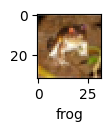

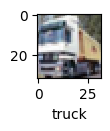

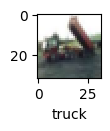

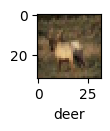

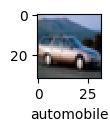

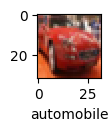

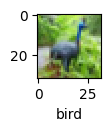

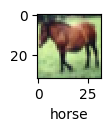

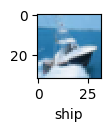

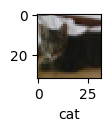

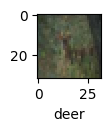

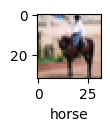

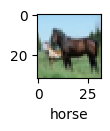

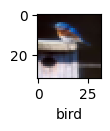

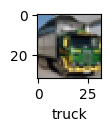

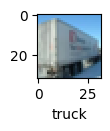

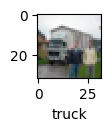

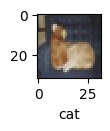

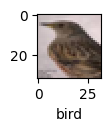

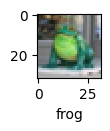

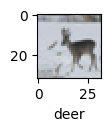

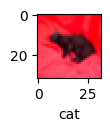

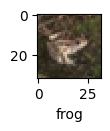

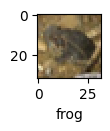

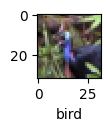

In [ ]:
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
  plt.show()

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.4997 - accuracy: 0.4543 - val_loss: 1.2658 - val_accuracy: 0.5451
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1298 - accuracy: 0.6008 - val_loss: 1.0401 - val_accuracy: 0.6316
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9830 - accuracy: 0.6537 - val_loss: 0.9668 - val_accuracy: 0.6620
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8840 - accuracy: 0.6910 - val_loss: 0.9456 - val_accuracy: 0.6690
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8103 - accuracy: 0.7166 - val_loss: 0.8783 - val_accuracy: 0.6952
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7546 - accuracy: 0.7348 - val_loss: 0.8529 - val_accuracy: 0.7083
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7037 - accuracy: 0.7534 - val_loss: 0.9298 - val_accuracy

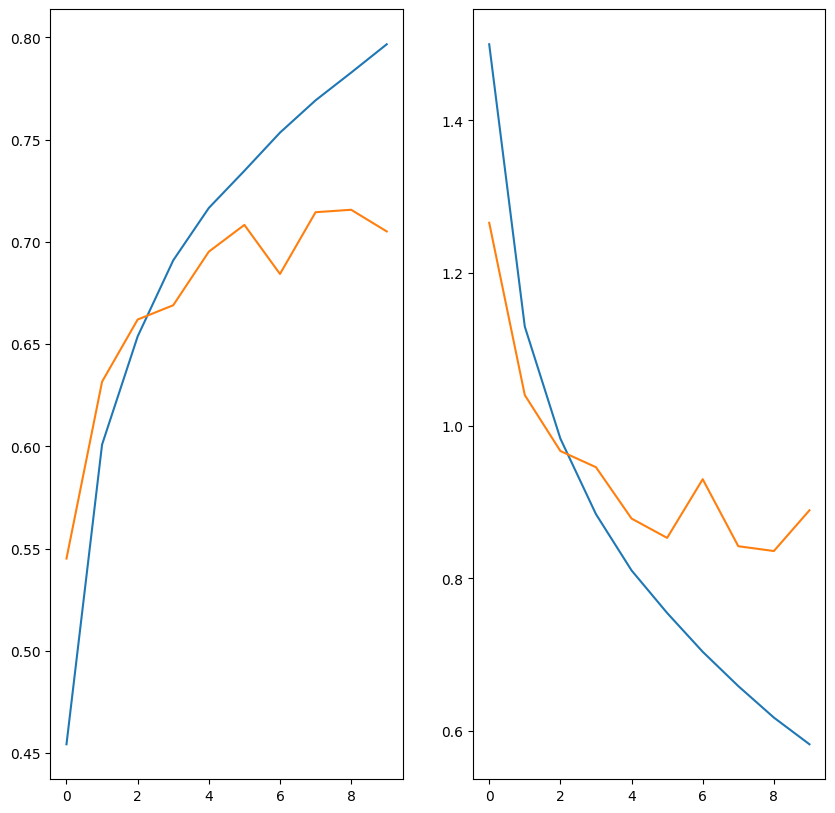

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])